In [71]:
#타랑께 이용지점 빈도수
import pandas as pd
import numpy as np
a = pd.read_csv('자전거_사용시간_최종.csv',index_col = 0,encoding = 'cp949')
df = pd.DataFrame(a) #종합(평일+주말) 사용시간 
df

,출발시각,도착시각,사용시간
0,2020-07-01 8:25,2020-07-01 8:31,0 days 00:06:24
1,2020-07-01 11:21,2020-07-01 12:24,0 days 01:02:50
2,2020-07-01 11:34,2020-07-01 11:44,0 days 00:09:59
3,2020-07-01 11:40,2020-07-01 11:59,0 days 00:18:59
4,2020-07-01 12:45,2020-07-01 12:54,0 days 00:08:58
...,...,...,...
10860,2021-02-05 13:59,2021-02-05 14:07,0 days 00:07:28
10861,2021-02-05 14:11,2021-02-05 14:29,0 days 00:18:05
10862,2021-02-05 14:16,2021-02-05 15:30,0 days 01:14:11
10863,2021-02-05 14:50,2021-02-05 18:40,0 days 03:49:59


# 월별 현황

In [78]:
start=[]
for x in range(0, len(df)): 
    start.append(df['출발시각'][x]) #출발시각 열 추출

In [79]:
month = []
for i in range(0, len(df)):  #월 추출
    month.append(start[i][5:7])

In [74]:
dict = {}
for v in month:#월별 사용량 키, 밸류값으로 분류
    if dict.get(v): dict[v]+=1
    else : dict[v]=1
        
print(dict)

{'07': 446, '08': 1438, '09': 2723, '10': 3594, '11': 1324, '12': 629, '01': 582, '02': 129}


In [75]:
y = (list(dict.values()))
x = (list(dict.keys()))

In [76]:
x

['07', '08', '09', '10', '11', '12', '01', '02']

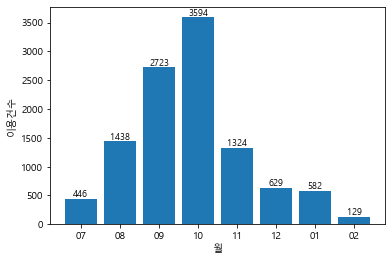

In [77]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.bar(x, y) #
plt.xlabel('월')
plt.ylabel('이용건수') #월별 사용량 시각화

for i,v in enumerate(x) :
    plt.text(v, y[i], y[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )


plt.show()

--------

# 탑승 지속시간

## hour

In [49]:
usage=[]
for x in range(1, len(df)):
    usage.append(df['사용시간'][x]) #사용시간 추출

In [50]:
hour = []
minute = []        #시간, 분 추출
for i in range(0, len(usage)):
    if usage[i][8] == '0':
        minute.append(usage[i][10:12])
    elif usage[i][8] != '0' :
        hour.append(usage[i][8])

In [51]:
hour_int = list(map(int, hour)) 
remove_set = {4, 5, 6, 7, 8, 9} 
hour_new = [i for i in hour_int if i not in remove_set]

In [52]:
dict = {} 
for v in hour_new:
    if dict.get(v): dict[v]+=1
    else : dict[v]=1
        
print(dict)

{1: 2574, 2: 227, 3: 84}


In [53]:
hour = [60, 120, 180]             #
hour_count = (list(dict.values()))

## minute

In [54]:
minute.sort()

In [55]:
dict1 = {}
for v in minute:        #분 추출
    if dict1.get(v): dict1[v]+=1
    else : dict1[v]=1

In [56]:
x = (list(dict1.keys()))
y = (list(dict1.values()))
x = list(map(int, x))

In [57]:
minute_by_10 = [] # 분 10분 단위 사용량 추출
division = [10, 20, 30, 40, 50, 60]
for i in division:
    q = sum(y[i-10:i])
    minute_by_10.append(q)

## hour + minute

In [58]:
a = division + hour
b = minute_by_10 + hour_count

In [59]:
a = ['~10분', '~20분', '~30분', '~40분', '~50분', '~60분', '~120분', '~180분', '그외'] # 10분단위 x축 나타내기

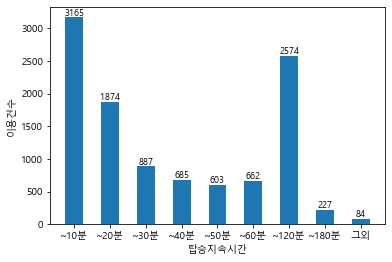

In [61]:
#그래프 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('탑승지속시간')
plt.ylabel('이용건수')
plt.bar(a, b, width=0.5)
for i,v in enumerate(a) :
    plt.text(v, b[i], b[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )

plt.show()

-------

# 시간대별 현황

In [80]:
time=[]
for x in range(0, len(df)):
    time.append(df['출발시각'][x])
type(time)

list

In [81]:
time1 = []
for i in range(0, len(df)):
    if time[i][12] == ':':
        time1.append(time[i][11])
    else:
        time1.append(time[i][11:13])

In [82]:
time1_list = [int (i) for i in time1]

In [83]:
time1_list.sort()

In [84]:
dict2 = {}
for v in time1_list:
    if dict2.get(v): dict2[v]+=1
    else : dict2[v]=1
        
print(dict2)

{7: 159, 8: 520, 9: 458, 10: 380, 11: 525, 12: 593, 13: 672, 14: 881, 15: 972, 16: 1075, 17: 1140, 18: 1263, 19: 1098, 20: 1118, 21: 10, 23: 1}


In [67]:
a = (list(dict2.keys()))
b = (list(dict2.values()))
a_str = list(map(str,a))

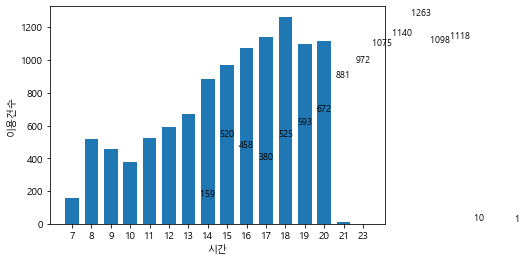

In [70]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.bar(a_str, b, width=0.7) #시간별 이용건수
for i,v in enumerate(a) :
    plt.text(v, b[i], b[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )

plt.show()